In [1]:
import os
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


/tmp/ipykernel_4178496/2562353217.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

# Define the directory path
directory = "/net/projects/cmap/model-outputs/"

# Create an empty list to store data
data = []

# Iterate through all folders in the directory
for root, dirs, files in os.walk(directory):
    for file in files:
        if file == "dsi.py":
            # Open and read parameters from dsi.py
            dsi_file_path = os.path.join(root, file)
            with open(dsi_file_path, 'r') as dsi_file:
                dsi_content = dsi_file.read()
            
            # Execute the Python script in dsi.py to define variables
            exec(dsi_content, globals())  # Execute the Python script with global namespace
            
            dsi_params = {
                'Folder_Title': os.path.basename(root),
                'MODEL': MODEL,
                'BACKBONE': BACKBONE,
                'WEIGHTS': WEIGHTS,
                'BATCH_SIZE': BATCH_SIZE,
                'PATCH_SIZE': PATCH_SIZE,
                'NUM_CLASSES': NUM_CLASSES,
                'LR': LR,
                'NUM_WORKERS': NUM_WORKERS,
                'EPOCHS': EPOCHS,
                'IGNORE_INDEX': IGNORE_INDEX
            }
             # Append parameters to the data list
            data.append(dsi_params)

        if "events.out.tfevents" in file:
            # Open and read statistics from events.out.tfevents
            events_file_path = os.path.join(root, file)
            event_acc = EventAccumulator(events_file_path)
            event_acc.Reload()
            # Get the final statistics
            # Get all available tags
            available_tags = event_acc.Tags()
            
            # Loop through available tags and extract data
            for tag in available_tags['scalars']:
                scalar_events = event_acc.Scalars(tag)
                for event in scalar_events:
                    data.append({'Folder_Title': os.path.basename(root),
                                 'Tag': tag,
                                 'Step': event.step,
                                 'Value': event.value})
# Convert data to DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df)


        Folder_Title MODEL  BACKBONE WEIGHTS  BATCH_SIZE  PATCH_SIZE  \
0      VectorDataset  unet  resnet50    True        32.0       512.0   
1    20240218-172022  unet  resnet50    True        32.0       512.0   
2    20240218-172022   NaN       NaN     NaN         NaN         NaN   
3    20240218-172022   NaN       NaN     NaN         NaN         NaN   
4    20240218-172022   NaN       NaN     NaN         NaN         NaN   
..               ...   ...       ...     ...         ...         ...   
789  20240218-154842  unet  resnet50   False        32.0       512.0   
790  20240213-111329   NaN       NaN     NaN         NaN         NaN   
791  20240213-111329   NaN       NaN     NaN         NaN         NaN   
792  20240213-111329   NaN       NaN     NaN         NaN         NaN   
793  20240213-111329   NaN       NaN     NaN         NaN         NaN   

     NUM_CLASSES     LR  NUM_WORKERS  EPOCHS  IGNORE_INDEX           Tag  \
0            5.0  0.001          8.0    11.0           0.0 

In [11]:
import pandas as pd

# Assuming df is your DataFrame containing the extracted data
# First, group the DataFrame by 'Folder_Title' and then use transform to duplicate the values
df[['MODEL', 'BACKBONE', 'WEIGHTS', 'BATCH_SIZE', 'PATCH_SIZE', 'NUM_CLASSES', 'LR', 
    'NUM_WORKERS', 'EPOCHS', 'IGNORE_INDEX']] = \
    df.groupby('Folder_Title')[['MODEL', 'BACKBONE', 'WEIGHTS', 'BATCH_SIZE', 'PATCH_SIZE', 
                                 'NUM_CLASSES', 'LR', 'NUM_WORKERS', 'EPOCHS', 'IGNORE_INDEX']] \
        .transform('first')

# Drop duplicates to keep only unique rows
df = df.drop_duplicates()

# Display DataFrame
df


,Folder_Title,MODEL,BACKBONE,WEIGHTS,BATCH_SIZE,PATCH_SIZE,NUM_CLASSES,LR,NUM_WORKERS,EPOCHS,IGNORE_INDEX,Tag,Step,Value
0,VectorDataset,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,11.0,0.0,NaN,NaN,NaN
1,20240218-172022,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,5.0,0.0,NaN,NaN,NaN
2,20240218-172022,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,5.0,0.0,Loss/train,1.0,0.314062
3,20240218-172022,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,5.0,0.0,Loss/train,2.0,0.302922
4,20240218-172022,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,5.0,0.0,Loss/train,3.0,0.307505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,20240218-154842,unet,resnet50,False,32.0,512.0,5.0,0.001,8.0,2.0,0.0,NaN,NaN,NaN
790,20240213-111329,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Loss/train,1.0,0.324335
791,20240213-111329,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metric/train,1.0,0.236456
792,20240213-111329,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Loss/test,1.0,0.553813


In [12]:
df[:20]

,Folder_Title,MODEL,BACKBONE,WEIGHTS,BATCH_SIZE,PATCH_SIZE,NUM_CLASSES,LR,NUM_WORKERS,EPOCHS,IGNORE_INDEX,Tag,Step,Value
0,VectorDataset,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,11.0,0.0,NaN,NaN,NaN
1,20240218-172022,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,5.0,0.0,NaN,NaN,NaN
2,20240218-172022,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,5.0,0.0,Loss/train,1.0,0.314062
3,20240218-172022,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,5.0,0.0,Loss/train,2.0,0.302922
4,20240218-172022,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,5.0,0.0,Loss/train,3.0,0.307505
5,20240218-172022,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,5.0,0.0,Loss/train,4.0,0.289852
6,20240218-172022,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,5.0,0.0,IoU/train,1.0,0.285215
7,20240218-172022,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,5.0,0.0,IoU/train,2.0,0.362658
8,20240218-172022,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,5.0,0.0,IoU/train,3.0,0.377329
9,20240218-172022,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,5.0,0.0,IoU/train,4.0,0.359183


In [13]:
df.groupby(["Folder_Title", "Tag"]).last().sort_values("EPOCHS", ascending = False)

MODEL  BACKBONE WEIGHTS  BATCH_SIZE  \
Folder_Title    Tag                                                       
sjne-20240215-0 Loss/test      deeplabv3+  resnet50    True        32.0   
                Loss/train     deeplabv3+  resnet50    True        32.0   
                Jaccard/test   deeplabv3+  resnet50    True        32.0   
                Jaccard/train  deeplabv3+  resnet50    True        32.0   
patchsize1024   Loss/test            unet  resnet50    True         8.0   
...                                   ...       ...     ...         ...   
20240215-130242 Loss/train           None      None    None         NaN   
20240215-132952 Jaccard/test         None      None    None         NaN   
                Jaccard/train        None      None    None         NaN   
                Loss/test            None      None    None         NaN   
                Loss/train           None      None    None         NaN   

                               PATCH_SIZE  NUM_CLASSES     LR  NUM_WORKERS  \
Folder_Title    Tag                                                          
sjne-20240215-0 Loss/test           512.0          5.0  0.001          8.0   
                Loss/train          512.0          5.0  0.001          8.0   
                Jaccard/test        512.0          5.0  0.001          8.0   
                Jaccard/train       512.0          5.0  0.001          8.0   
patchsize1024   Loss/test          1024.0          5.0  0.001          8.0   
...                                   ...          ...    ...          ...   
20240215-130242 Loss/train            NaN          NaN    NaN          NaN   
20240215-132952 Jaccard/test          NaN          NaN    NaN          NaN   
                Jaccard/train         NaN          NaN    NaN          NaN   
                Loss/test             NaN          NaN    NaN          NaN   
                Loss/train            NaN          NaN    NaN          NaN   

                               EPOCHS  IGNORE_INDEX  Step     Value  
Folder_Title    Tag                                                  
sjne-20240215-0 Loss/test        50.0           0.0  50.0  0.492339  
                Loss/train       50.0           0.0  50.0  0.269171  
                Jaccard/test     50.0           0.0  50.0  0.398847  
                Jaccard/train    50.0           0.0  50.0  0.525160  
patchsize1024   Loss/test        30.0           0.0  30.0  0.490615  
...                               ...           ...   ...       ...  
20240215-130242 Loss/train        NaN           NaN  30.0  0.247669  
20240215-132952 Jaccard/test      NaN           NaN   6.0  0.053661  
                Jaccard/train     NaN           NaN   6.0  0.348194  
                Loss/test         NaN           NaN   6.0  0.464661  
                Loss/train        NaN           NaN   6.0  0.214666  

[66 rows x 12 columns]

In [42]:
testdf = df.groupby(["Folder_Title", "Tag"]).last().reset_index(drop=False)
testdf = testdf.loc[testdf.Tag == "Loss/test"].reset_index(drop=True)
testdf

,Folder_Title,Tag,MODEL,BACKBONE,WEIGHTS,BATCH_SIZE,PATCH_SIZE,NUM_CLASSES,LR,NUM_WORKERS,EPOCHS,IGNORE_INDEX,Step,Value
0,20240212-174710,Loss/test,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.522701
1,20240213-111329,Loss/test,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.553813
2,20240213-153205,Loss/test,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.740552
3,20240214-115600,Loss/test,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.572675
4,20240214-120747,Loss/test,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.648341
5,20240215-130242,Loss/test,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,0.485764
6,20240215-132952,Loss/test,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.464661
7,20240218-160925,Loss/test,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,2.0,0.0,2.0,0.494344
8,20240218-172022,Loss/test,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,5.0,0.0,3.0,0.495614
9,eightyTwentySplit,Loss/test,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,11.0,0.0,7.0,0.276803


In [26]:
loss_test

,Folder_Title,Tag,MODEL,BACKBONE,WEIGHTS,BATCH_SIZE,PATCH_SIZE,NUM_CLASSES,LR,NUM_WORKERS,EPOCHS,IGNORE_INDEX,Step,Value
0,20240213-153205,Metric/test,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.369088
1,20240213-153205,Metric/train,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.276694
2,20240214-115600,Loss/test,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.572675
3,20240215-132952,Loss/test,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.464661
4,20240215-132952,Loss/train,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.214666
5,20240218-143701,IoU/train,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,2.0,0.0,1.0,0.379803
6,20240218-143701,Loss/train,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,2.0,0.0,1.0,0.316626
7,20240218-160925,IoU/test,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,2.0,0.0,2.0,0.370175
8,eightyTwentySplit,Loss/train,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,11.0,0.0,7.0,0.387047
9,longEightyTwentySplit,Jaccard/test,unet,resnet50,True,32.0,512.0,5.0,0.001,8.0,30.0,0.0,14.0,0.664711


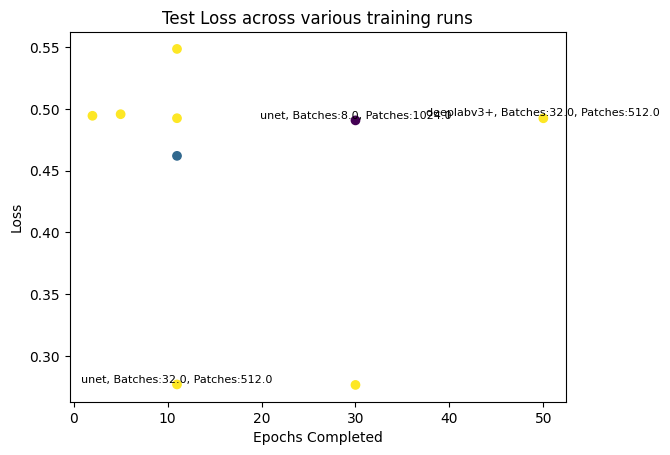

In [47]:
import matplotlib.pyplot as plt

loss_test = df.groupby(["Folder_Title", "Tag"]).last().reset_index(drop=False)
loss_test = loss_test.loc[loss_test.Tag == "Loss/test"].reset_index(drop=True)
plt.scatter(loss_test.EPOCHS, loss_test.Value, label = loss_test.Folder_Title, c = loss_test.BATCH_SIZE)

# Add specific test runs to the highlight list to add annotations
highlight = ["patchsize1024", "sjne-20240215-0", "eightyTwentySplit"]

for i, label in enumerate(loss_test.MODEL): #This adds an annotation on each scatter dot
    if loss_test.Folder_Title[i] in highlight:
        label = label + ", Batches:" + str(loss_test.BATCH_SIZE[i]) + ", Patches:" + str(loss_test.PATCH_SIZE[i])
        plt.text(loss_test.EPOCHS[i], loss_test.Value[i], label, fontsize=8, ha='center', va='bottom')
plt.xlabel("Epochs Completed")
plt.ylabel("Loss")
plt.title("Test Loss across various training runs")
plt.show()

In [52]:
df.groupby(["Folder_Title", "Tag"]).last().reset_index(drop=False).nunique()

Folder_Title    17
Tag              8
MODEL            2
BACKBONE         1
WEIGHTS          1
BATCH_SIZE       3
PATCH_SIZE       2
NUM_CLASSES      1
LR               1
NUM_WORKERS      1
EPOCHS           5
IGNORE_INDEX     1
Step            11
Value           64
dtype: int64